# __Importing__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('./dataset/csv_data/cleaned_data.csv')
df = dataset.copy()

In [9]:
years= set()
for i in range(len(df)):
    year = df['post_date'][i].replace('(',',').split(',')[1]
    years.add(year)
    

In [10]:
year

'2023'

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8619 entries, 0 to 8618
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_code        8619 non-null   int64  
 1   post_date        8619 non-null   object 
 2   district         8619 non-null   object 
 3   square           8448 non-null   float64
 4   bedroom          6518 non-null   float64
 5   bathroom         6200 non-null   float64
 6   house_direction  2778 non-null   object 
 7   has_balcony      8619 non-null   bool   
 8   has_furniture    8619 non-null   bool   
 9   has_legal_info   8619 non-null   bool   
 10  is_hurried       8619 non-null   bool   
 11  floor            8619 non-null   int64  
 12  has_basement     8619 non-null   bool   
 13  house_type       8619 non-null   object 
 14  price            8619 non-null   float64
dtypes: bool(5), float64(4), int64(2), object(4)
memory usage: 715.6+ KB


In [25]:
dataset.describe(include='all')  

,post_code,post_date,district,square,bedroom,bathroom,house_direction,has_balcony,has_furniture,has_legal_info,is_hurried,floor,has_basement,house_type,price
count,8619.000000,8619,8619,8448.000000,6518.000000,6200.000000,2778,8619,8619,8619,8619,8619.000000,8619,8619,8619.000000
unique,NaN,8470,23,NaN,NaN,NaN,8,2,2,2,2,NaN,2,4,NaN
top,NaN,"[datetime.datetime(2023, 11, 1, 14, 32)]",Gò Vấp,NaN,NaN,NaN,đông,False,False,True,False,NaN,False,nhà riêng,NaN
freq,NaN,3,1145,NaN,NaN,NaN,1416,7172,7255,6035,6645,NaN,8447,6957,NaN
mean,267220.850331,NaN,NaN,76.520447,3.626419,3.425484,NaN,NaN,NaN,NaN,NaN,3.055691,NaN,NaN,8.619100
std,10261.246193,NaN,NaN,106.684165,3.173741,3.121551,NaN,NaN,NaN,NaN,NaN,2.069888,NaN,NaN,14.924852
min,247475.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.360000
25%,258206.500000,NaN,NaN,44.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,4.000000
50%,266523.000000,NaN,NaN,60.000000,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,5.600000
75%,276679.500000,NaN,NaN,82.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,8.500000


In [26]:
dataset.describe(include='all')

,post_code,post_date,district,square,bedroom,bathroom,house_direction,has_balcony,has_furniture,has_legal_info,is_hurried,floor,has_basement,house_type,price
count,8619.000000,8619,8619,8448.000000,6518.000000,6200.000000,2778,8619,8619,8619,8619,8619.000000,8619,8619,8619.000000
unique,NaN,8470,23,NaN,NaN,NaN,8,2,2,2,2,NaN,2,4,NaN
top,NaN,"[datetime.datetime(2023, 11, 1, 14, 32)]",Gò Vấp,NaN,NaN,NaN,đông,False,False,True,False,NaN,False,nhà riêng,NaN
freq,NaN,3,1145,NaN,NaN,NaN,1416,7172,7255,6035,6645,NaN,8447,6957,NaN
mean,267220.850331,NaN,NaN,76.520447,3.626419,3.425484,NaN,NaN,NaN,NaN,NaN,3.055691,NaN,NaN,8.619100
std,10261.246193,NaN,NaN,106.684165,3.173741,3.121551,NaN,NaN,NaN,NaN,NaN,2.069888,NaN,NaN,14.924852
min,247475.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.360000
25%,258206.500000,NaN,NaN,44.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,4.000000
50%,266523.000000,NaN,NaN,60.000000,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,5.600000
75%,276679.500000,NaN,NaN,82.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,8.500000


# __Prepocessing__

__Outlier Handling__

In [27]:
def detect_outliers_zscore(data, thres=2.5):
    outliers = []
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in range(len(data)):
        z_score = (data[i]-mean)/std
        if np.abs(z_score) > thres:
            outliers.append(i)
    return outliers

square_outlier_index = detect_outliers_zscore(dataset["square"])
print(f"Square outlier indices: {square_outlier_index}")

bedroom_outlier_index = detect_outliers_zscore(dataset["bedroom"])
print(f"Bedroom outlier indices: {bedroom_outlier_index}")

bathroom_outlier_index = detect_outliers_zscore(dataset["bathroom"])
print(f"Bathroom outlier indices: {bathroom_outlier_index}")

floor_outlier_index = detect_outliers_zscore(dataset["floor"])
print(f"Floor outlier indices: {floor_outlier_index}")

price_outlier_index = detect_outliers_zscore(dataset["price"])
print(f"Price outlier indices: {price_outlier_index}")

Square outlier indices: [29, 476, 478, 557, 587, 639, 915, 948, 1137, 1228, 1281, 1383, 1443, 1598, 1601, 1625, 1681, 1738, 1763, 1846, 1857, 1925, 2082, 2105, 2125, 2207, 2216, 2247, 2289, 2406, 2700, 2812, 2925, 3020, 3107, 3207, 3247, 3261, 3266, 3313, 3323, 3338, 3362, 3363, 3410, 3478, 3517, 3544, 3627, 3670, 3689, 3921, 3943, 4026, 4116, 4205, 4219, 4220, 4232, 4348, 4470, 4625, 4724, 4981, 5127, 5160, 5267, 5313, 5334, 5652, 5698, 5951, 5982, 6000, 6037, 6158, 6229, 6256, 6282, 6467, 6504, 6674, 6789, 6856, 6857, 6863, 6919, 7244, 7269, 7372, 7468, 7565, 7838, 8097, 8098, 8163, 8368, 8587, 8608]
Bedroom outlier indices: [99, 175, 297, 573, 899, 915, 927, 974, 1178, 1226, 1243, 1310, 1343, 1344, 1367, 1625, 1644, 1657, 1739, 1823, 1925, 1952, 1963, 1964, 2058, 2260, 2288, 2289, 2358, 2400, 2531, 2750, 2837, 2873, 2916, 3086, 3107, 3407, 3410, 3524, 3629, 3647, 3700, 3815, 3921, 3982, 4141, 4499, 4516, 4625, 4652, 4804, 4891, 5118, 5160, 5185, 5190, 5231, 5238, 5394, 5416, 5525, 5

In [28]:
mean_square = np.mean(dataset["square"])
mean_bedroom = np.mean(dataset["bedroom"])
mean_bathroom = np.mean(dataset["bathroom"])
mean_floor = np.mean(dataset["floor"])

outlier_index = square_outlier_index + bedroom_outlier_index + bathroom_outlier_index + floor_outlier_index + price_outlier_index
outlier_index = list(set(outlier_index))

dataset.drop(outlier_index, inplace=True)

# dataset.loc[square_outlier_index, "square"] = np.mean(mean_square)
# dataset.loc[bedroom_outlier_index, "bedroom"] = np.round(np.mean(mean_bedroom), 0)
# dataset.loc[bathroom_outlier_index, "bathroom"] = np.round(np.mean(mean_bathroom), 0)
# dataset.loc[floor_outlier_index, "floor"] = np.round(np.mean(mean_floor), 0)

# dataset.drop(price_outlier_index, inplace=True)

__Missing Value Handling__

In [29]:
dataset.isna().sum()/dataset.shape[0]

post_code          0.000000
post_date          0.000000
district           0.000000
square             0.019959
bedroom            0.237586
bathroom           0.274137
house_direction    0.676566
has_balcony        0.000000
has_furniture      0.000000
has_legal_info     0.000000
is_hurried         0.000000
floor              0.000000
has_basement       0.000000
house_type         0.000000
price              0.000000
dtype: float64

In [30]:
# mean_square = np.mean(dataset["square"])
# mean_bedroom = np.mean(dataset["bedroom"])
# mean_bathroom = np.mean(dataset["bathroom"])

dataset["square"] = dataset["square"].fillna(mean_square)
dataset["bedroom"] = dataset["bedroom"].fillna(np.round(mean_bedroom, 0))
dataset["bathroom"] = dataset["bathroom"].fillna(np.round(mean_bathroom, 0))


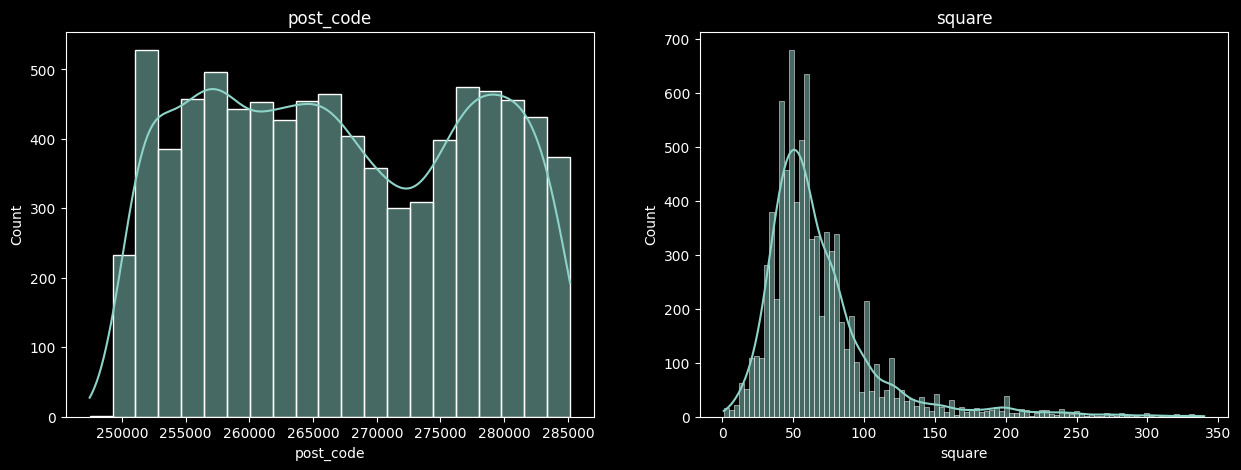

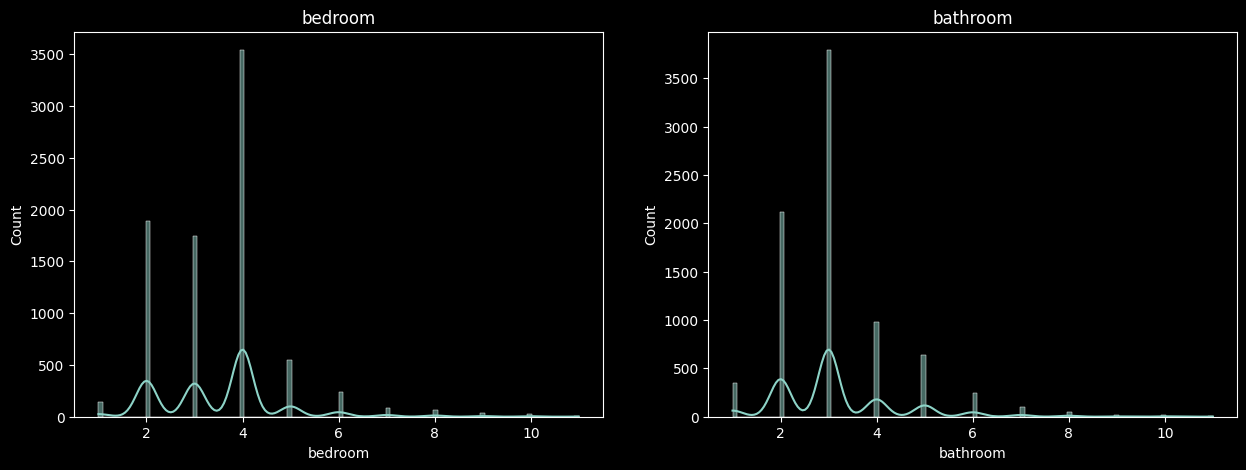

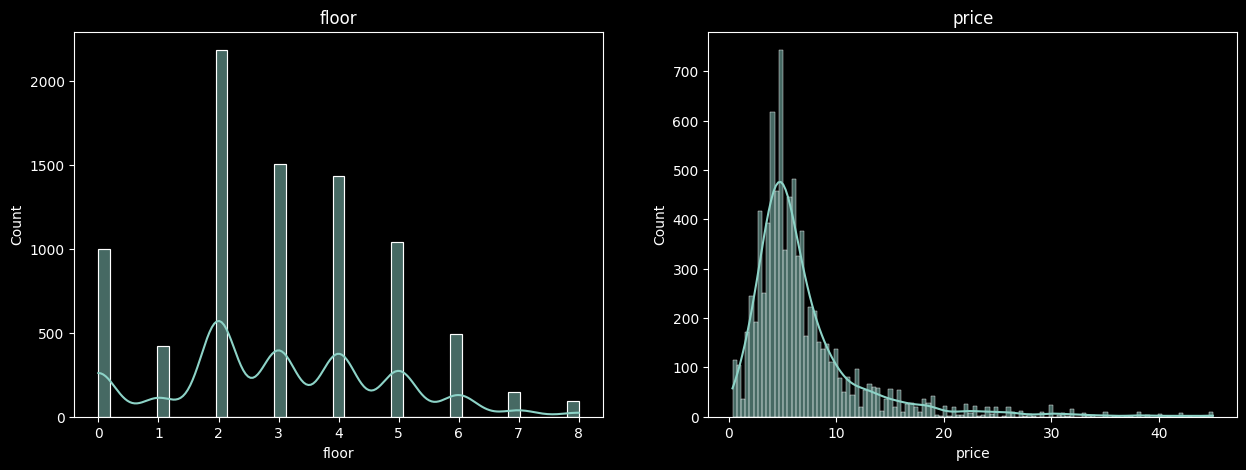

In [31]:
numerical_features = dataset.select_dtypes(include=[np.number])
def plot_numerical_features(num_features, num_cols = 2, figsize = (15, 3)):
    num_features_count = len(numerical_features.columns)

    i = 0
    while i < num_features_count:
        fig, ax = plt.subplots(nrows=1, ncols=num_cols, figsize=figsize)
        for j in range(num_cols):
            if i < num_features_count:
                sns.histplot(numerical_features.iloc[:, i], kde=True, ax=ax[j])
                ax[j].set_title(numerical_features.columns[i])
                i += 1
        plt.show()

plot_numerical_features(numerical_features, num_cols=2, figsize=(15, 5))

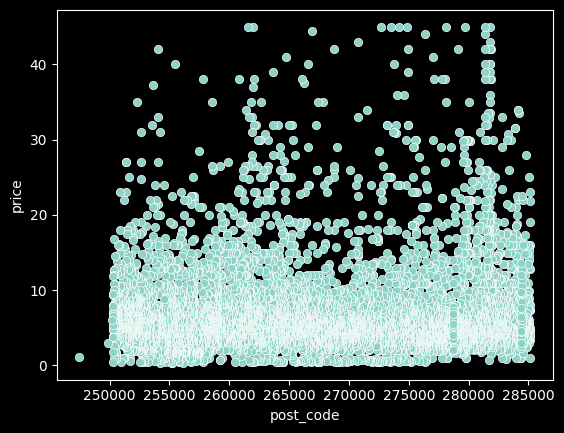

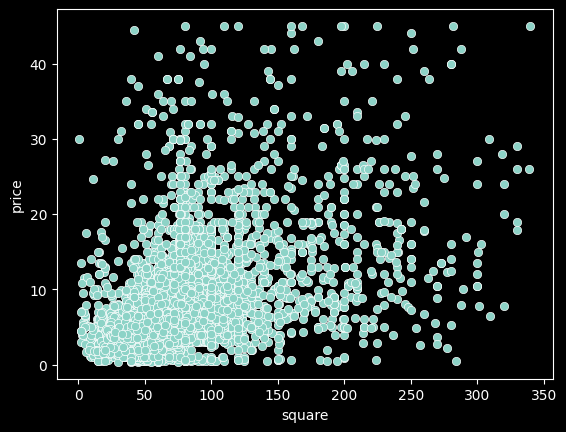

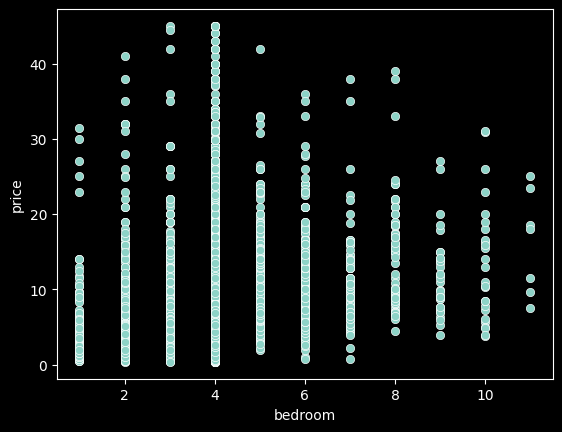

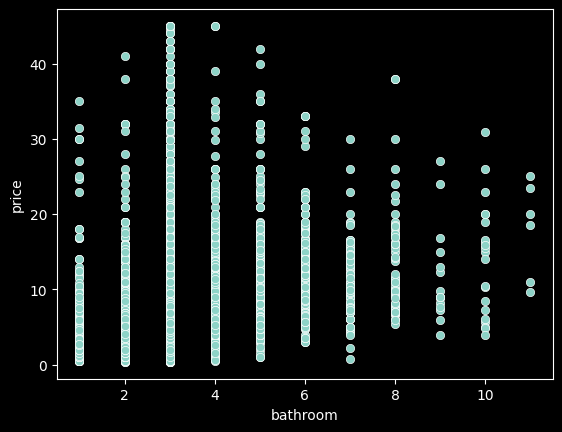

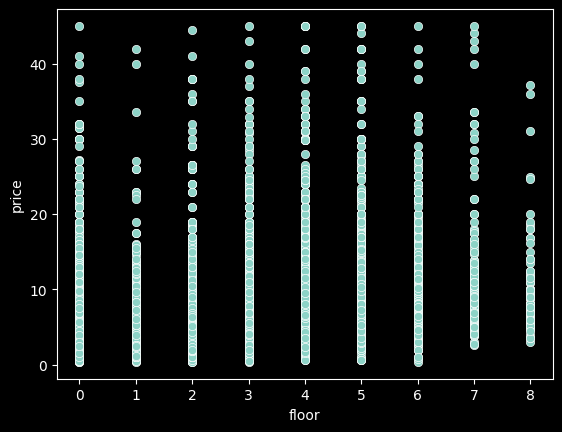

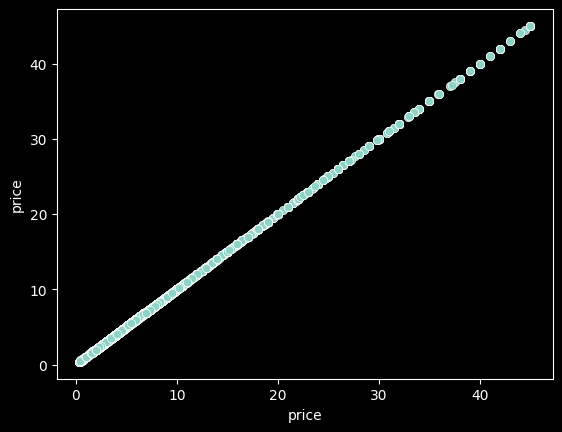

In [32]:
target = dataset['price']

for feature in numerical_features:
    sns.scatterplot(x=feature, y=target, data=dataset)
    plt.show()

Encoding and Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
dataset["house_type"].value_counts()

house_type
nhà riêng      6787
nhà mặt phố    1473
luxury home      53
nhà cổ            4
Name: count, dtype: int64

Building model

In [35]:
from  joblib import load
from preprocessing import outlier_removal_transformer, out_range_transformer, nan_drop_transformer, nan_manhattan_distance, NothingTransformer, NanIgnoringNormalizer, MapEncoder, BooleanEncoder, KNNImputer, MinMaxScaler
dropper_pipeline = load("dropper.joblib")
feature_processor = load("feature_processor.joblib")
target_processor = load("target_processor.joblib")

df = dropper_pipeline.transform(df)
X = feature_processor.transform(df)
y = target_processor.transform(df)

In [36]:
df.shape

(7523, 15)

In [37]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score, make_scorer

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': [1, 10, 100],  
            'gamma': [1, 0.1, 0.01, 'scale', 'auto'], 
            'epsilon': [0.1, 1, 10],
            'kernel': ['rbf'],}  

param_search = RandomizedSearchCV(SVR(), param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv = 4, random_state=42)
param_search.fit(X_train, y_train.ravel())

RandomizedSearchCV(cv=4, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [1, 10, 100],
                                        'epsilon': [0.1, 1, 10],
                                        'gamma': [1, 0.1, 0.01, 'scale',
                                                  'auto'],
                                        'kernel': ['rbf']},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [39]:
param_search.best_params_

{'kernel': 'rbf', 'gamma': 1, 'epsilon': 1, 'C': 100}

In [40]:
model = SVR(**param_search.best_params_)
model.fit(X_train, y_train.ravel())

y_pred_val = model.predict(X_val)
y_pred_train = model.predict(X_train)

print(f"Train MSE: {(mean_squared_error(y_train, y_pred_train))} - Val MSE: {(mean_squared_error(y_val, y_pred_val))}")
print(f"Train MAE: {mean_absolute_error(y_train, y_pred_train)} - Val MAE: {mean_absolute_error(y_val, y_pred_val)}")
print(f"Train R2: {r2_score(y_train, y_pred_train)} - Val R2: {r2_score(y_val, y_pred_val)}")

Train MSE: 4.324395384324487 - Val MSE: 4.626999762583863
Train MAE: 1.4832293220808044 - Val MAE: 1.545423051389924
Train R2: 0.5111994509878268 - Val R2: 0.4745703175506838


In [41]:
from sklearn.model_selection import cross_validate

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Define the scoring dictionary
scoring = {
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'r2': 'r2'
}

# Perform cross-validation
result = cross_validate(model, X, y.ravel(), cv=6, scoring=scoring, return_train_score=True)

In [42]:
pd.DataFrame(result).mean().round(2)

fit_time                         1.31
score_time                       0.49
test_neg_mean_absolute_error    -1.55
train_neg_mean_absolute_error   -1.49
test_neg_mean_squared_error     -4.70
train_neg_mean_squared_error    -4.36
test_r2                          0.46
train_r2                         0.51
dtype: float64